In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path = 'drive/MyDrive/spot'
valid_path = 'drive/MyDrive/spot'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 classes = ['Garbage','Non-Garbage'],subset='training')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['Garbage','Non-Garbage'],subset='validation')

Found 2454 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model_details=model.fit(x=training_set, validation_data=test_set, batch_size = 32, epochs = 25, verbose = 2,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/25
77/77 - 106s - loss: 0.6327 - accuracy: 0.6275 - val_loss: 0.5915 - val_accuracy: 0.6367 - 106s/epoch - 1s/step
Epoch 2/25
77/77 - 92s - loss: 0.5671 - accuracy: 0.6830 - val_loss: 0.5686 - val_accuracy: 0.7122 - 92s/epoch - 1s/step
Epoch 3/25
77/77 - 94s - loss: 0.5471 - accuracy: 0.7156 - val_loss: 0.5838 - val_accuracy: 0.6714 - 94s/epoch - 1s/step
Epoch 4/25
77/77 - 92s - loss: 0.5111 - accuracy: 0.7543 - val_loss: 0.4979 - val_accuracy: 0.7735 - 92s/epoch - 1s/step
Epoch 5/25
77/77 - 94s - loss: 0.4951 - accuracy: 0.7567 - val_loss: 0.5504 - val_accuracy: 0.7082 - 94s/epoch - 1s/step
Epoch 6/25
77/77 - 91s - loss: 0.4796 - accuracy: 0.7596 - val_loss: 0.4763 - val_accuracy: 0.7592 - 91s/epoch - 1s/step
Epoch 7/25
77/77 - 89s - loss: 0.4646 - accuracy: 0.7730 - val_loss: 0.4738 - val_accuracy: 0.7510 - 89s/epoch - 1s/step
Epoch 8/25
77/77 - 95s - loss: 0.4392 - accuracy: 0.7910 - val_loss: 0.4206 - val_accuracy: 0.7939 - 95s/epoch - 1s/step
Epoch 9/25
77/77 - 90s - loss:

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [9]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

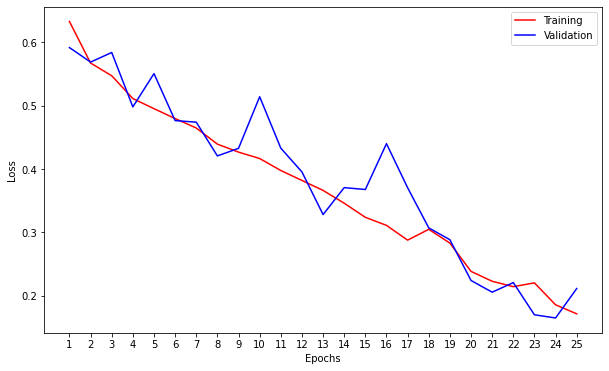

In [11]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

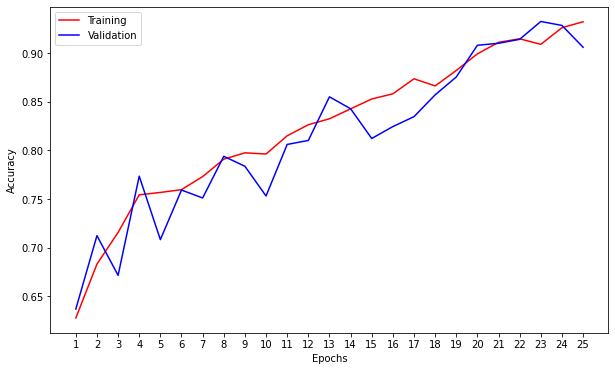

In [12]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [13]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("simplecnn_dump.tflite", 'wb').write(tflite_model)

6521096